# Неполяризующиеся электроды для электроразведки.

## Исследование электролитов и загустителей для медных и для графитовых электродов.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from IPython.display import display
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Создаём датасет по первым экспериментам - графит в разных электролитах
graphit01 = pd.read_csv('graphit_01.csv')

#Создаём датасет по повторному эксперименту "Графит в сульфате меди"
graphit02_cuso4 = pd.read_csv('graphit_cuso4.csv')

#Создаём датасет по повторному эксперименту "Графит в хлориде натрия"
graphit02_nacl = pd.read_csv('graphit_nacl.csv')

#Создаём датасет по собранным медно-сульфатным электродам с каолином.
cu_cuso4 = pd.read_csv('cu_system01.csv')


### Графит. Пара электродов в различных электролитах.

In [3]:
#Оценка данных о графите в разных электролитах
display(graphit01)
graphit01.info()

,time,electrolit,delta_U_1_2,comments
0,2025-02-24T20:00,CuSO4,-8.0,start
1,2025-02-24T21:00,CuSO4,-8.0,NaN
2,2025-02-25T00:00,CuSO4,-3.8,NaN
3,2025-02-25T01:00,CuSO4,-2.9,NaN
4,2025-02-25T08:00,CuSO4,-1.0,NaN
...,...,...,...,...
62,2025-03-19T20:00,NaHCO3_2,-13.0,NaN
63,2025-03-19T22:00,NaHCO3_2,-13.5,NaN
64,2025-03-20T00:00,NaHCO3_2,-13.4,NaN
65,2025-03-20T08:00,NaHCO3_2,-13.8,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   time         67 non-null     object 
 1   electrolit   67 non-null     object 
 2   delta_U_1_2  67 non-null     float64
 3   comments     9 non-null      object 
dtypes: float64(1), object(3)
memory usage: 2.2+ KB


In [4]:
# Вытаскиваем список электролитов из таблицы
electrolites = graphit01['electrolit'].unique()
print(electrolites)

['CuSO4' 'NaCl' 'NaHCO3' 'KCl' 'KNO3' 'NaHCO3_2']


In [5]:
# Меняем формат дат.
graphit01['time'] = pd.to_datetime(graphit01['time'])

# Задаём время начала экспериментов
# Создаём вспомогательный датасет только со временами стартов
starts = graphit01.query('comments == "start"')
starts.set_index('electrolit', inplace=True)
print(starts)

# Функция извлечения времени по электролиту
def time_start(electrolit):
    tms = starts.loc[electrolit, 'time']
    return tms

# Добавляем столбец с временем старта
graphit01['time_start'] = graphit01['electrolit'].apply(time_start)
display(graphit01.head(5))

                          time  delta_U_1_2 comments
electrolit                                          
CuSO4      2025-02-24 20:00:00         -8.0    start
NaCl       2025-02-26 21:00:00          7.0    start
NaHCO3     2025-03-01 23:00:00        -21.0    start
KCl        2025-03-04 14:00:00         -6.4    start
KNO3       2025-03-08 21:00:00         28.0    start
NaHCO3_2   2025-03-18 12:00:00        -33.6    start


,time,electrolit,delta_U_1_2,comments,time_start
0,2025-02-24 20:00:00,CuSO4,-8.0,start,2025-02-24 20:00:00
1,2025-02-24 21:00:00,CuSO4,-8.0,NaN,2025-02-24 20:00:00
2,2025-02-25 00:00:00,CuSO4,-3.8,NaN,2025-02-24 20:00:00
3,2025-02-25 01:00:00,CuSO4,-2.9,NaN,2025-02-24 20:00:00
4,2025-02-25 08:00:00,CuSO4,-1.0,NaN,2025-02-24 20:00:00


In [6]:
# Считаем длительность эксперимента
graphit01['delta_t'] = (graphit01['time'] - graphit01['time_start']) 

#Переводим длительность эксперимента из timedelta в количество часов (float) (для графики)
graphit01['delta_t_hour'] = graphit01['delta_t'] / pd.Timedelta("1h")

display(graphit01.head(5))
graphit01.info()

,time,electrolit,delta_U_1_2,comments,time_start,delta_t,delta_t_hour
0,2025-02-24 20:00:00,CuSO4,-8.0,start,2025-02-24 20:00:00,0 days 00:00:00,0.0
1,2025-02-24 21:00:00,CuSO4,-8.0,NaN,2025-02-24 20:00:00,0 days 01:00:00,1.0
2,2025-02-25 00:00:00,CuSO4,-3.8,NaN,2025-02-24 20:00:00,0 days 04:00:00,4.0
3,2025-02-25 01:00:00,CuSO4,-2.9,NaN,2025-02-24 20:00:00,0 days 05:00:00,5.0
4,2025-02-25 08:00:00,CuSO4,-1.0,NaN,2025-02-24 20:00:00,0 days 12:00:00,12.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   time          67 non-null     datetime64[ns] 
 1   electrolit    67 non-null     object         
 2   delta_U_1_2   67 non-null     float64        
 3   comments      9 non-null      object         
 4   time_start    67 non-null     datetime64[ns] 
 5   delta_t       67 non-null     timedelta64[ns]
 6   delta_t_hour  67 non-null     float64        
dtypes: datetime64[ns](2), float64(2), object(2), timedelta64[ns](1)
memory usage: 3.8+ KB


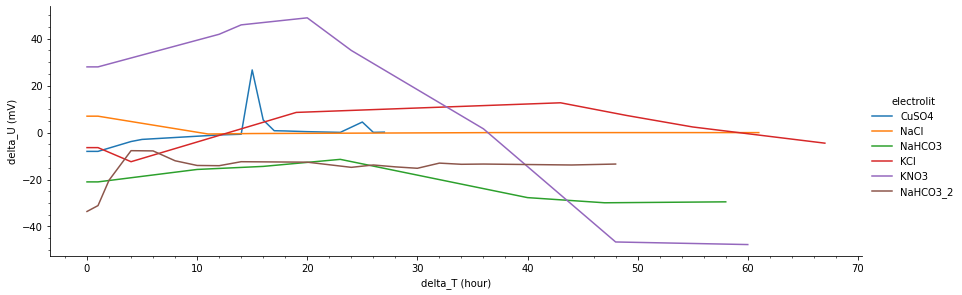

In [32]:
sns.axes_style('whitegrid')
grf01 = sns.relplot(data=graphit01, 
            kind='line',
            x = 'delta_t_hour', 
            y = 'delta_U_1_2', 
            hue='electrolit',
            height=4, aspect=3,
            
            )
#grf01.xaxis.set_major_locator(plt.MaxNLocator(40))

plt.minorticks_on()
grf01.set_axis_labels("delta_T (hour)", "delta_U (mV)")
plt.show()


Электролит NaHCO3_2 - повторный эксперимент. Использовалась пара электродов (№3 - №4).

### Графит в сульфате меди. Повторный эксперимент.

In [8]:
#Создаём датасет по повторному эксперименту "Графит в сульфате меди"
#graphit02_cuso4 = pd.read_csv('graphit_cuso4.csv')
#cu = pd.read_csv('graphit_cuso4.csv')

display(graphit02_cuso4.head(5))
graphit02_cuso4.info()

,time,electrolit,1-2,1-3,1-4,comments
0,2025-03-12T10:00,cuso4_2,1.2,-147.0,-205.0,start09:45
1,2025-03-12T10:30,cuso4_2,0.5,-200.0,-145.0,NaN
2,2025-03-12T11:00,cuso4_2,1.6,-194.2,-125.9,NaN
3,2025-03-12T12:00,cuso4_2,1.2,-189.5,-98.3,NaN
4,2025-03-12T13:00,cuso4_2,0.6,-183.4,-70.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        52 non-null     object 
 1   electrolit  52 non-null     object 
 2   1-2         52 non-null     float64
 3   1-3         52 non-null     float64
 4   1-4         52 non-null     float64
 5   comments    3 non-null      object 
dtypes: float64(3), object(3)
memory usage: 2.6+ KB


In [9]:
# Меняем формат дат.
graphit02_cuso4['time'] = pd.to_datetime(graphit02_cuso4['time'], format = '%Y-%m-%dT%H:%M')

# Считаем разность потенциалов между 3-4:
graphit02_cuso4['3-4'] = graphit02_cuso4['1-3'] - graphit02_cuso4['1-4']
display(graphit02_cuso4.head(5))
graphit02_cuso4.info()

,time,electrolit,1-2,1-3,1-4,comments,3-4
0,2025-03-12 10:00:00,cuso4_2,1.2,-147.0,-205.0,start09:45,58.0
1,2025-03-12 10:30:00,cuso4_2,0.5,-200.0,-145.0,NaN,-55.0
2,2025-03-12 11:00:00,cuso4_2,1.6,-194.2,-125.9,NaN,-68.3
3,2025-03-12 12:00:00,cuso4_2,1.2,-189.5,-98.3,NaN,-91.2
4,2025-03-12 13:00:00,cuso4_2,0.6,-183.4,-70.0,NaN,-113.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        52 non-null     datetime64[ns]
 1   electrolit  52 non-null     object        
 2   1-2         52 non-null     float64       
 3   1-3         52 non-null     float64       
 4   1-4         52 non-null     float64       
 5   comments    3 non-null      object        
 6   3-4         52 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.0+ KB


In [10]:
# Задаём время начала эксперимента
time_start = pd.to_datetime('2025-03-12 10:00')
print('время старта:', time_start)

# Считаем длительность эксперимента
graphit02_cuso4['delta_t'] = (graphit02_cuso4['time'] - time_start) 
#df['delta_t'] = pd.to_timedelta(df['delta_t'], unit='h')
#df['delta_t'] = pd.interval_range(start=time_start, end=df['time'])

#Переводим длительность эксперимента из timedelta в количество часов (float)
graphit02_cuso4['delta_t_hour'] = graphit02_cuso4['delta_t'] / pd.Timedelta("1h")
graphit02_cuso4.info()
display(graphit02_cuso4)

время старта: 2025-03-12 10:00:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   time          52 non-null     datetime64[ns] 
 1   electrolit    52 non-null     object         
 2   1-2           52 non-null     float64        
 3   1-3           52 non-null     float64        
 4   1-4           52 non-null     float64        
 5   comments      3 non-null      object         
 6   3-4           52 non-null     float64        
 7   delta_t       52 non-null     timedelta64[ns]
 8   delta_t_hour  52 non-null     float64        
dtypes: datetime64[ns](1), float64(5), object(2), timedelta64[ns](1)
memory usage: 3.8+ KB


,time,electrolit,1-2,1-3,1-4,comments,3-4,delta_t,delta_t_hour
0,2025-03-12 10:00:00,cuso4_2,1.2,-147.0,-205.0,start09:45,58.0,0 days 00:00:00,0.0
1,2025-03-12 10:30:00,cuso4_2,0.5,-200.0,-145.0,NaN,-55.0,0 days 00:30:00,0.5
2,2025-03-12 11:00:00,cuso4_2,1.6,-194.2,-125.9,NaN,-68.3,0 days 01:00:00,1.0
3,2025-03-12 12:00:00,cuso4_2,1.2,-189.5,-98.3,NaN,-91.2,0 days 02:00:00,2.0
4,2025-03-12 13:00:00,cuso4_2,0.6,-183.4,-70.0,NaN,-113.4,0 days 03:00:00,3.0
5,2025-03-12 14:00:00,cuso4_2,0.4,-176.1,-50.4,NaN,-125.7,0 days 04:00:00,4.0
6,2025-03-12 15:00:00,cuso4_2,0.0,-169.8,-44.4,NaN,-125.4,0 days 05:00:00,5.0
7,2025-03-12 16:00:00,cuso4_2,0.9,-162.1,-39.6,NaN,-122.5,0 days 06:00:00,6.0
8,2025-03-12 19:00:00,cuso4_2,0.2,-134.5,-31.8,NaN,-102.7,0 days 09:00:00,9.0
9,2025-03-12 20:00:00,cuso4_2,0.2,-122.6,-29.3,NaN,-93.3,0 days 10:00:00,10.0


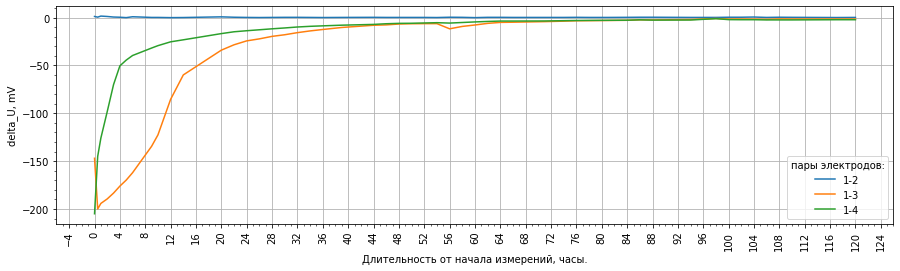

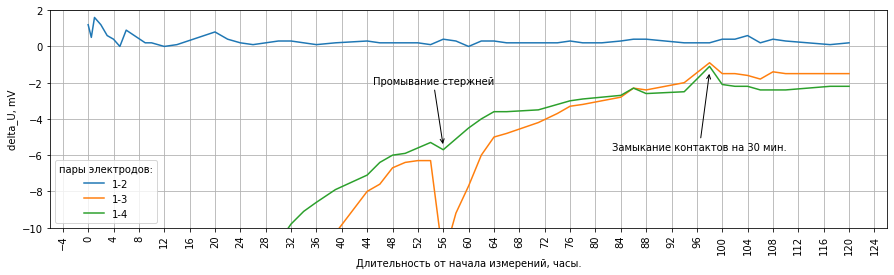

In [11]:
#fig1, ax = plt.subplots(figsize=(15,4))
ax1 = graphit02_cuso4.plot(x='delta_t_hour', y=['1-2', '1-3', '1-4'], figsize=(15, 4), grid=True, rot=90)
ax1.minorticks_on()  # добавляем минорные деления на шкалы
ax1.xaxis.set_major_locator(plt.MaxNLocator(40))
#ax1.set_yscale('log')
ax1.legend(title='пары электродов:')
ax1.set(ylabel = 'delta_U, mV', xlabel='Длительность от начала измерений, часы.'
       #, title = 'Разность потенциалов графитовых стержней в растворе медного купороса. Эксперимент №2'
       )

ax2 = graphit02_cuso4.plot(x='delta_t_hour', 
                           y=['1-2', '1-3', '1-4'], 
                           figsize=(15, 4), 
                           grid=True, rot=90, ylim=(-10,2))
ax1.minorticks_on()
ax2.xaxis.set_major_locator(plt.MaxNLocator(40))
ax2.legend(title='пары электродов:')
ax2.set(ylabel = 'delta_U, mV', xlabel='Длительность от начала измерений, часы.')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.plot(x=df['delta_t'], y=df['1-3'])
#plt.plot(df, x='delta_t', y='1-4')

ax2.annotate('Промывание стержней',
             xy=(56, -5.5), 
             xycoords='data',
             xytext=(-10, 60), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'),
             horizontalalignment='center', 
             verticalalignment='bottom')

ax2.annotate('Замыкание контактов на 30 мин.',
             xy=(98, -1.4), 
             xycoords='data',
             xytext=(-10, -80), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'),
             horizontalalignment='center', 
             verticalalignment='bottom')

plt.show()

###  Графит в растворе хлорида натрия. Повторный эксперимент.



In [12]:
graphit02_nacl.info()
#display(graphit02_nacl)

# Меняем формат дат.
graphit02_nacl['time'] = pd.to_datetime(graphit02_nacl['time']
                                        # , format = '%Y-%m-%dT%H:%M'
                                        )

# Считаем разность потенциалов между 5-6:
graphit02_nacl['5-6'] = graphit02_nacl['1-5'] - graphit02_nacl['1-6']

graphit02_nacl.info()
display(graphit02_nacl.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        30 non-null     object 
 1   electrolit  30 non-null     object 
 2   1-2         30 non-null     float64
 3   1-5         22 non-null     float64
 4   1-6         22 non-null     float64
 5   comments    5 non-null      object 
dtypes: float64(3), object(3)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        30 non-null     datetime64[ns]
 1   electrolit  30 non-null     object        
 2   1-2         30 non-null     float64       
 3   1-5         22 non-null     float64       
 4   1-6         22 non-null     float64       
 5   comments    5 non-null      object        
 6   5-6         22 non-null    

,time,electrolit,1-2,1-5,1-6,comments,5-6
0,2025-03-17 10:00:00,NaCl_2,27.0,-392.0,-515.0,start10:00,123.0
1,2025-03-17 12:00:00,NaCl_2,27.0,-392.0,-515.0,NaN,123.0
2,2025-03-17 14:00:00,NaCl_2,46.0,-310.0,-515.0,NaN,205.0
3,2025-03-17 16:00:00,NaCl_2,57.2,-262.0,-310.0,NaN,48.0
4,2025-03-17 18:00:00,NaCl_2,32.7,-222.0,-305.0,NaN,83.0


In [13]:
# Задаём время начала эксперимента
time_start = pd.to_datetime('2025-03-17 10:00')
print('время старта:', time_start)

# Считаем длительность эксперимента
graphit02_nacl['delta_t'] = (graphit02_nacl['time'] - time_start) 
#df['delta_t'] = pd.to_timedelta(df['delta_t'], unit='h')
#df['delta_t'] = pd.interval_range(start=time_start, end=df['time'])

#Переводим длительность эксперимента из timedelta в количество часов (float)
graphit02_nacl['delta_t_hour'] = graphit02_nacl['delta_t'] / pd.Timedelta("1h")
#graphit02_nacl.info()
display(graphit02_nacl)

время старта: 2025-03-17 10:00:00


,time,electrolit,1-2,1-5,1-6,comments,5-6,delta_t,delta_t_hour
0,2025-03-17 10:00:00,NaCl_2,27.0,-392.0,-515.0,start10:00,123.0,0 days 00:00:00,0.0
1,2025-03-17 12:00:00,NaCl_2,27.0,-392.0,-515.0,NaN,123.0,0 days 02:00:00,2.0
2,2025-03-17 14:00:00,NaCl_2,46.0,-310.0,-515.0,NaN,205.0,0 days 04:00:00,4.0
3,2025-03-17 16:00:00,NaCl_2,57.2,-262.0,-310.0,NaN,48.0,0 days 06:00:00,6.0
4,2025-03-17 18:00:00,NaCl_2,32.7,-222.0,-305.0,NaN,83.0,0 days 08:00:00,8.0
5,2025-03-17 20:00:00,NaCl_2,24.6,-204.0,-276.0,NaN,72.0,0 days 10:00:00,10.0
6,2025-03-17 22:00:00,NaCl_2,18.2,-178.0,-241.0,NaN,63.0,0 days 12:00:00,12.0
7,2025-03-18 00:00:00,NaCl_2,10.3,-165.8,-232.0,NaN,66.2,0 days 14:00:00,14.0
8,2025-03-18 02:00:00,NaCl_2,4.7,-158.5,-228.0,NaN,69.5,0 days 16:00:00,16.0
9,2025-03-18 08:00:00,NaCl_2,6.5,-134.5,-204.0,NaN,69.5,0 days 22:00:00,22.0


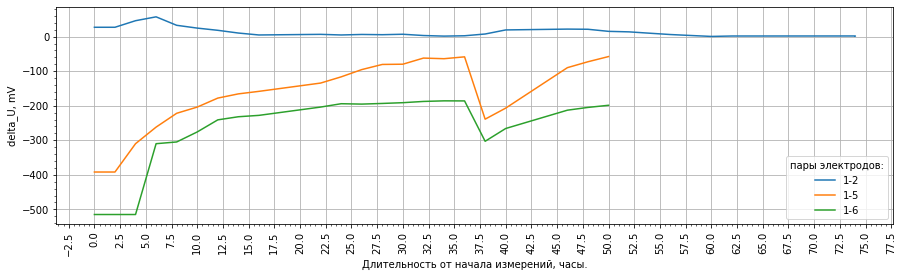

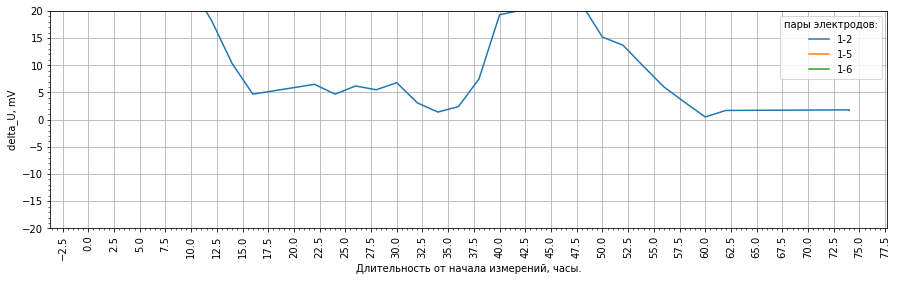

In [14]:
#fig1, ax = plt.subplots(figsize=(15,4))
ax3 = graphit02_nacl.plot(x='delta_t_hour', y=['1-2', '1-5', '1-6'], figsize=(15, 4), grid=True, rot=90)
ax3.minorticks_on()
ax3.xaxis.set_major_locator(plt.MaxNLocator(40))
#ax1.set_yscale('log')
ax3.legend(title='пары электродов:')
ax3.set(ylabel = 'delta_U, mV', xlabel='Длительность от начала измерений, часы.'
       #, title = 'Разность потенциалов графитовых стержней в растворе медного купороса. Эксперимент №2'
       )

ax4 = graphit02_nacl.plot(x='delta_t_hour', y=['1-2', '1-5', '1-6'], 
                          figsize=(15, 4), grid=True, rot=90, ylim=(-20,20))
ax4.minorticks_on()
ax4.xaxis.set_major_locator(plt.MaxNLocator(40))
ax4.legend(title='пары электродов:')
ax4.set(ylabel = 'delta_U, mV', xlabel='Длительность от начала измерений, часы.')
#ax1.xaxis.set_major_locator(plt.MultipleLocator(1))
#plt.plot(x=df['delta_t'], y=df['1-3'])
#plt.plot(df, x='delta_t', y='1-4')

plt.show()

##### Графит в растворе хлорида натрия. Повторный эксперимент. Комментарии.

Использовались электроды 1, 2, 5, 6 (№ 5 и №6 - новые, неустоявшиеся электроды).

Повторный эксперимент с графитом в растворе хлористого натрия пошел неудачно. Новые электроды не желают уменьшать свои электродные потенциалы. Возможно, что при этом дурно влияют на присутствующую тут же устоявшуюся пару электродов №1 и №2.

19.03.2025, в 08:00 (Спустя два дня от начала наблюдения) в систему были добавлены два графитовых стержня для карандаша. В течение часа разница потенциалов между ними уменьшилась до значений менее 1 мВ. 
Это говорит о том, что что-то не так с электродами.

19.03.2025 в 12:00 Электроды №5, №6 извлечены, ошкурены, отложены в сторону. Стоит понаблюдать, как поведут себя оставшиеся электроды №1 и №2. 

### Собранные медно-сульфатные электроды с каолином в ёмкости с водой.

In [15]:
cu_cuso4.info()

# Меняем формат дат.
cu_cuso4['time'] = pd.to_datetime(cu_cuso4['time'])

cu_cuso4.info()
display(cu_cuso4.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        35 non-null     object 
 1   electrolit  35 non-null     object 
 2   1-2         35 non-null     float64
 3   comments    2 non-null      object 
dtypes: float64(1), object(3)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        35 non-null     datetime64[ns]
 1   electrolit  35 non-null     object        
 2   1-2         35 non-null     float64       
 3   comments    2 non-null      object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 1.2+ KB


,time,electrolit,1-2,comments
0,2025-03-16 20:00:00,cuso4_2-kaolin,4.1,start
1,2025-03-16 21:00:00,cuso4_2-kaolin,4.1,NaN
2,2025-03-16 23:00:00,cuso4_2-kaolin,1.4,NaN
3,2025-03-17 00:00:00,cuso4_2-kaolin,1.4,NaN
4,2025-03-17 07:00:00,cuso4_2-kaolin,1.9,NaN


In [16]:
# Задаём время начала эксперимента
time_start = pd.to_datetime('2025-03-16 20:00')
print('время старта:', time_start)

# Считаем длительность эксперимента
cu_cuso4['delta_t'] = (cu_cuso4['time'] - time_start) 
#df['delta_t'] = pd.to_timedelta(df['delta_t'], unit='h')
#df['delta_t'] = pd.interval_range(start=time_start, end=df['time'])

#Переводим длительность эксперимента из timedelta в количество часов (float)
cu_cuso4['delta_t_hour'] = cu_cuso4['delta_t'] / pd.Timedelta("1h")
#graphit02_nacl.info()
display(cu_cuso4)

время старта: 2025-03-16 20:00:00


,time,electrolit,1-2,comments,delta_t,delta_t_hour
0,2025-03-16 20:00:00,cuso4_2-kaolin,4.1,start,0 days 00:00:00,0.0
1,2025-03-16 21:00:00,cuso4_2-kaolin,4.1,NaN,0 days 01:00:00,1.0
2,2025-03-16 23:00:00,cuso4_2-kaolin,1.4,NaN,0 days 03:00:00,3.0
3,2025-03-17 00:00:00,cuso4_2-kaolin,1.4,NaN,0 days 04:00:00,4.0
4,2025-03-17 07:00:00,cuso4_2-kaolin,1.9,NaN,0 days 11:00:00,11.0
5,2025-03-17 10:00:00,cuso4_2-kaolin,1.6,NaN,0 days 14:00:00,14.0
6,2025-03-17 12:00:00,cuso4_2-kaolin,1.4,NaN,0 days 16:00:00,16.0
7,2025-03-17 14:00:00,cuso4_2-kaolin,1.5,NaN,0 days 18:00:00,18.0
8,2025-03-17 16:00:00,cuso4_2-kaolin,1.2,NaN,0 days 20:00:00,20.0
9,2025-03-17 18:00:00,cuso4_2-kaolin,1.4,NaN,0 days 22:00:00,22.0


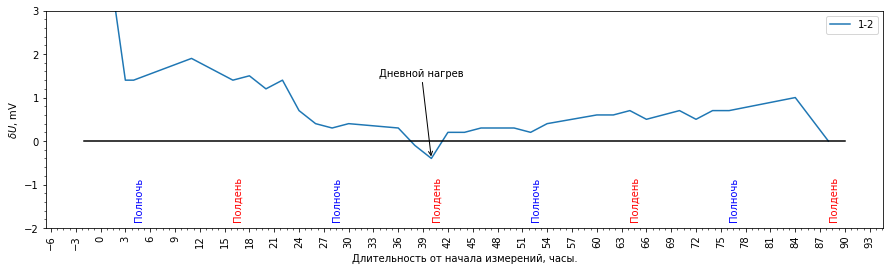

In [28]:
#fig1, ax = plt.subplots(figsize=(15,4))
ax5 = cu_cuso4.plot(x='delta_t_hour', y=['1-2'], figsize=(15, 4), grid=True, rot=90, ylim=(-2,3))
ax5.minorticks_on()
ax5.grid(which='major')
#ax5.grid(which='minor', linestyle=':')
#plt.plot(x='delta_t_hour', y=0)
ax5.xaxis.set_major_locator(plt.MaxNLocator(40))
#ax1.set_yscale('log')
#ax5.legend(title='пары электродов:')
ax5.set(ylabel = '$\delta U$, mV', xlabel='Длительность от начала измерений, часы.'
       #, title = 'Разность потенциалов медно-сульфатных электродов с каолином'
       )

ax5.annotate('Дневной нагрев',
             xy=(40, -0.4), 
             xycoords='data',
             xytext=(-10, 80), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'),
             horizontalalignment='center', 
             verticalalignment='bottom')

for i in range(0, 88, 24):
    ax5.text(16+i, -1.8, 'Полдень', rotation="vertical", color='r')
    ax5.text(4+i, -1.8, 'Полночь', rotation="vertical", color='b')

ax5.plot([-2, 90], [0, 0], 'k')
plt.show()

##### Медно-сульфатные неполяризующиеся электроды с каолином. Комментарии.

- Ёмкость электрода выполнена из картона и тканевой изоленты (5 слоёв).
- Два собранных электрода помещены в пластиковой ёмкости с небольшим количеством подсоленной воды на дне.
- Картонно-тканевая конструкция электрода намокает полностью и остаётся полностью мокрой все время, пока есть контакт с мокрой средой.
- Через несколько часов из электродов просочилось немного электролита в наружнюю водную среду, но это не сказалось на их разности потенциалов. 
- Все наблюдения проводились в обычных комнатных условиях (в среднем, примерно $20^o$ C). Обычный нагрев помещения весенним солнцем через окно приводит к некоторому уползанию потенциалов - это видно на синхронных измерениях. При возвращении температуры к обычным значениям, потенциалы тоже возвращаются к значениям до нагревания. 

Ранее была попытка собрать электроды на базе керамических фильтров для воды. Попытка была неудачная. У керамики для фильтров оказалась довольно большая пористость (скорость фильтрации водопроводной воды через эти фильтры составила 200 мл в час). В результате электролит внутри ёмкости и увлажнённый грунт снаружи перемешались. Внутрь ёмкости просочилась не просто вода, а грязь. Это пагубно сказалось на разности потенциалов между этими электродами.

Картонно-тканевые электроды получились довольно мягкие - "рубашка" электрода размокает (но за счет ткани не разваливается), а паста с электролитом сама по себе не очень плотно удерживает стержни. Это сказывается на процессе измерения напряжения - важно, чтобы в процессе измерения не шевелился стержень в электролите. 

То есть ёмкость для электрода желательно делать жесткой. Или делать жесткой часть, содержащую электролит - как в элементах Лекланше сделана очень плотная набивка тела элемента твёрдыми частицами пиролюзита и угля, и где-то между ними распределена паста электролита. Первое кажется проще, удобнее и разумнее.

Кажется, оптимальная ёмкость для электрода - пластиковый стакан с керамическим донцем. Керамика должна быть микропористой.
